# Explore here

VAMOS A IMPORTAR TODAS LAS LIBRERIAS NECESARIAS    

In [1]:
# # Librerías básicas
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y división de datos
from sklearn.model_selection import train_test_split

# Modelos
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Métricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Optimización
from sklearn.model_selection import GridSearchCV

# Guardar el modelo
import joblib


1. Creamos df con base de datos

In [2]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(url)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2. Vamos a visualizar que valores no tienen sentido clinico

In [5]:
# Valores 0 que no tienen sentido clínico
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(df[cols_with_zeros] == 0).sum()


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

3. Reemplazamos 0 por NaN

In [6]:
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

4. Vamos a rellenar con la mediana para no tener datos NaN


In [9]:
# Imputación con la mediana (opcionalmente se puede usar KNN o media)
df.fillna(df.median(), inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None


5. Analisis de variables

Variables numéricas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


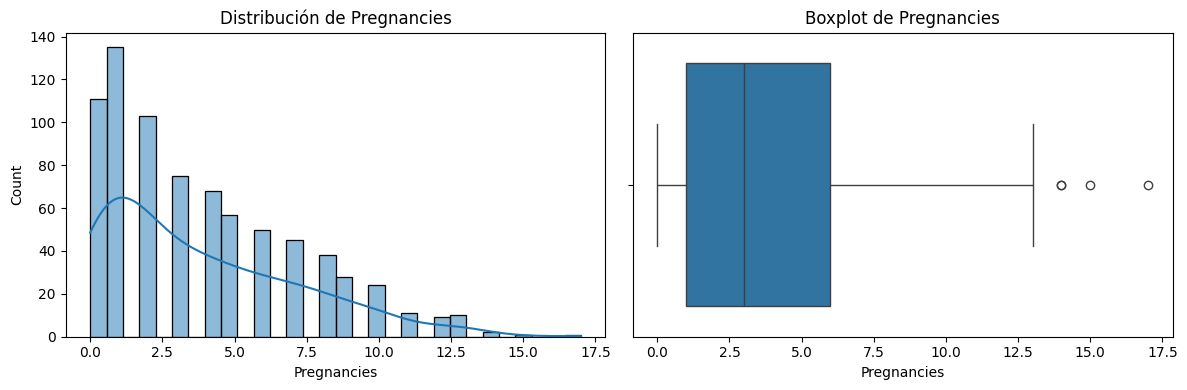

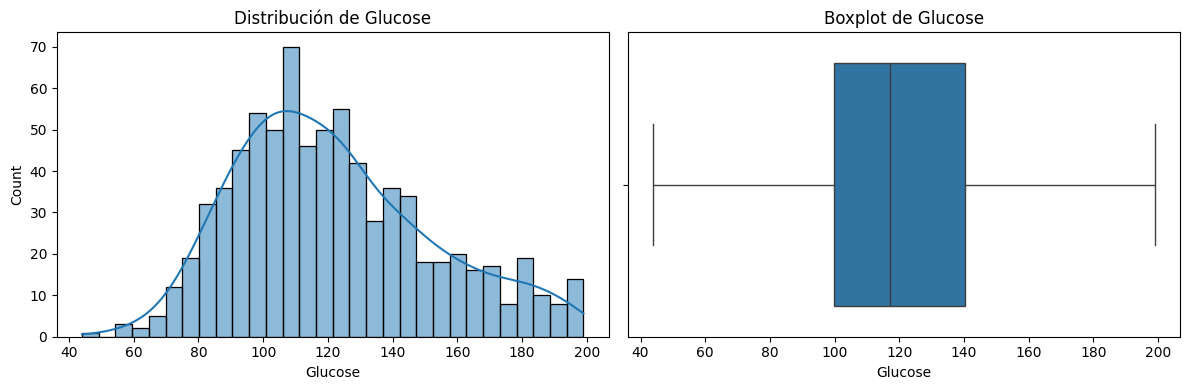

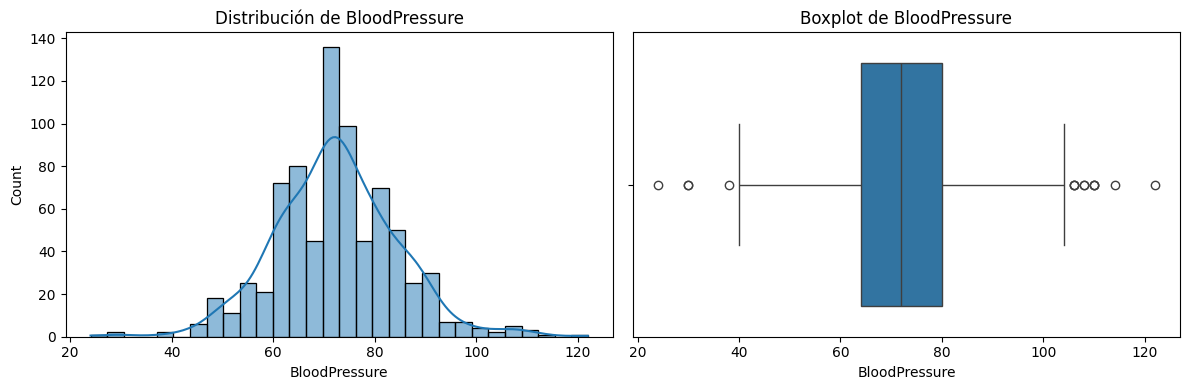

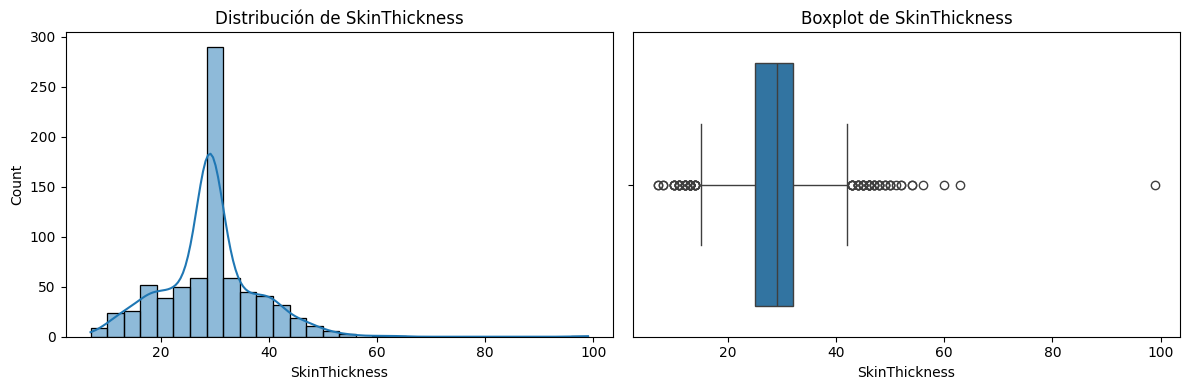

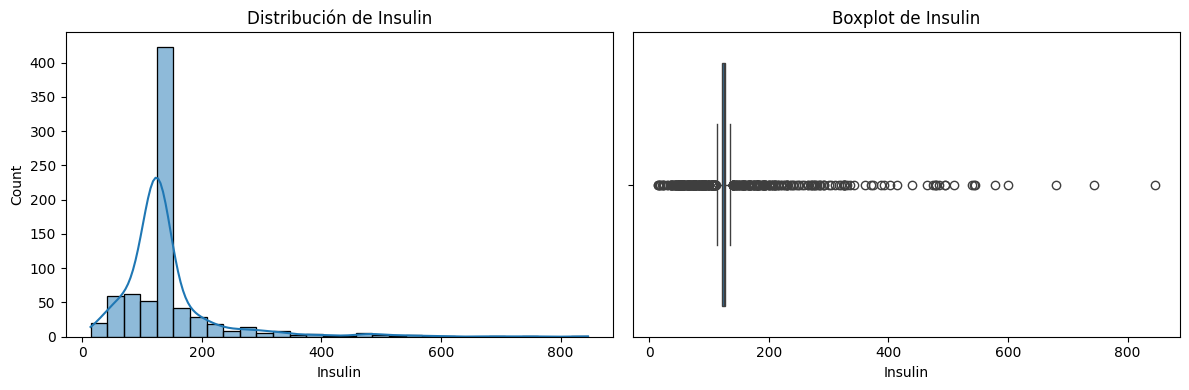

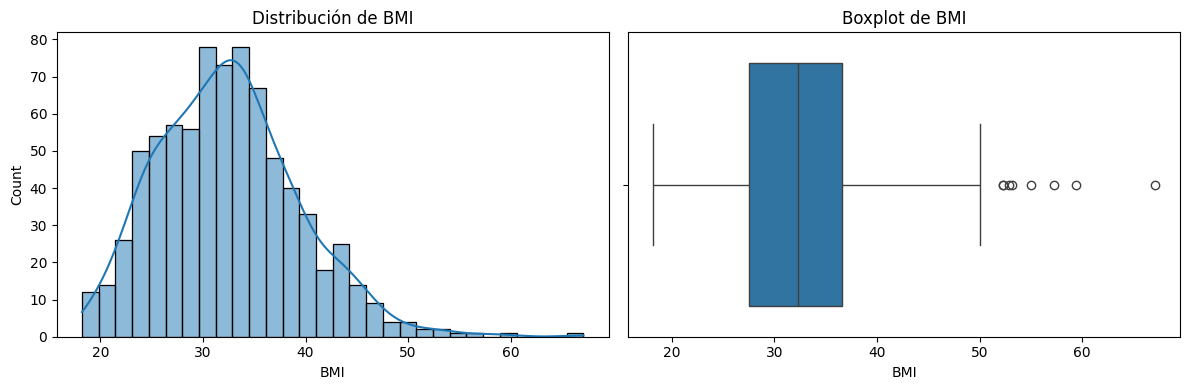

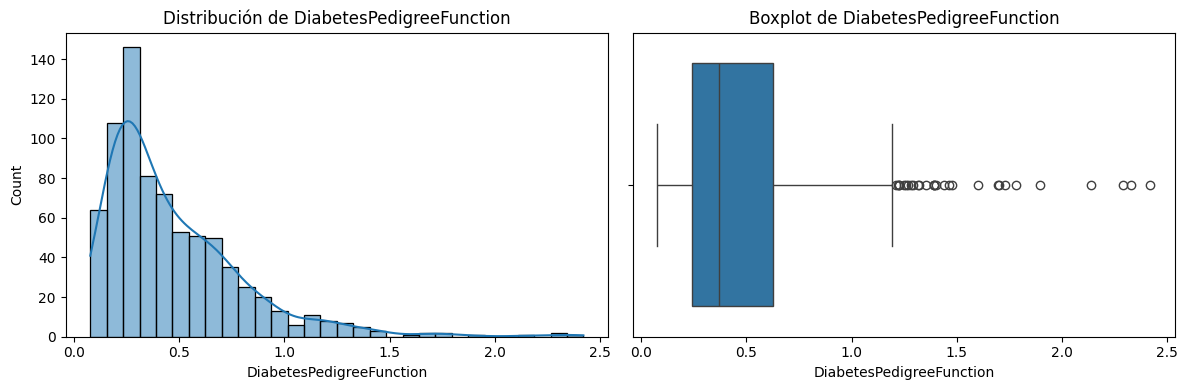

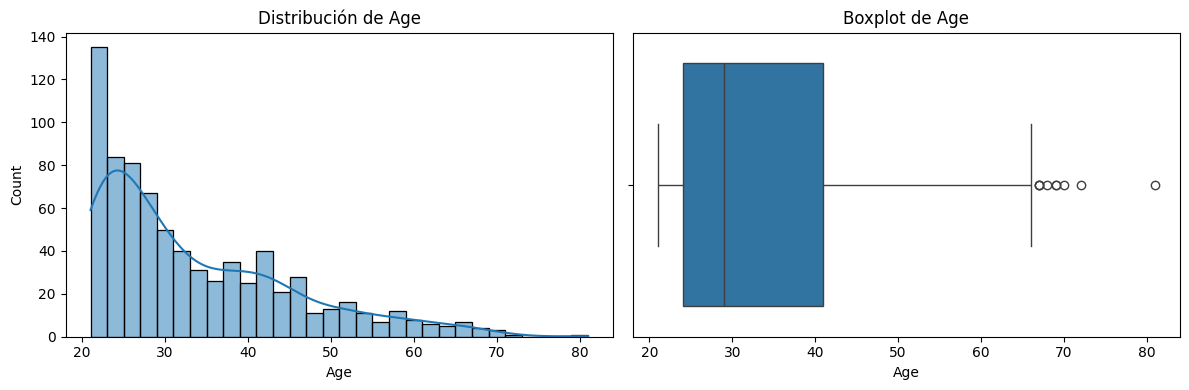

In [11]:
# Clasificamos variables
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Variables numéricas:", numericas)

# Outcome será tratada como categórica
categoricas = ['Outcome']
numericas.remove('Outcome')



# Histograma y boxplot por variable
for col in numericas:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(df[col], bins=30, kde=True, ax=axs[0])
    axs[0].set_title(f'Distribución de {col}')
    
    sns.boxplot(x=df[col], ax=axs[1])
    axs[1].set_title(f'Boxplot de {col}')
    
    plt.tight_layout()
    plt.show()


Conclusion analisis de variables: 


Podemos ver que practimente en todas las variables hay outliers, estos outliers en casos como Pregnancy, Glucose, Age, BMI y DiabetesPedigree no son extremos y podrian ser clinicamente validos.

Donde si vamos a tratar de solucionar es en BloodPressure con winsorizing.

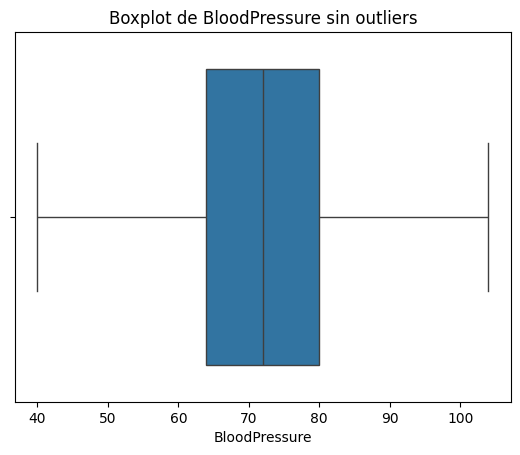

In [13]:
Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtramos el DataFrame
df = df[(df['BloodPressure'] >= lower_limit) & (df['BloodPressure'] <= upper_limit)]

sns.boxplot(x=df['BloodPressure'])
plt.title("Boxplot de BloodPressure sin outliers")
plt.show()


6. Division del dataset para entrenar modelo

In [14]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


Vamos a entrenar el modelo

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Modelo Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicción y evaluación
y_pred_lr = lr.predict(X_test)
print("Regresión Lineal")
print("R²:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))


Regresión Lineal
R²: 0.3420970749765456
MSE: 0.14927906614477723


MODELO LASSO

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)
print("Regresión Lasso (alpha=1.0)")
print("R²:", r2_score(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))


Regresión Lasso (alpha=1.0)
R²: 0.2502358210846516
MSE: 0.17012250926426384


COMPARATIVA DE LOS MODELOS SEGUN R2 Y MSE


Rinde mejor el modelo de regresion lineal frente al modelo Lasso.

Ahora vamos a tratar de optimizar con GridSearchCV

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.linspace(0.01, 20, 100)}
grid = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print("Mejor alpha:", grid.best_params_['alpha'])
print("Mejor R² (CV):", grid.best_score_)


Mejor alpha: 0.01
Mejor R² (CV): 0.26531872156614317


In [18]:
best_lasso = Lasso(alpha=0.01, max_iter=10000)
best_lasso.fit(X_train, y_train)

y_pred_best = best_lasso.predict(X_test)

print("Evaluación del mejor modelo Lasso:")
print("R² (test):", r2_score(y_test, y_pred_best))
print("MSE (test):", mean_squared_error(y_test, y_pred_best))


Evaluación del mejor modelo Lasso:
R² (test): 0.3350575900819246
MSE (test): 0.15087633481655255


El modelo Lasso con alpha=0.01 se aproxima mucho al rendimiento de la regresión lineal.

La optimizacion con GridSearchCV noo ofrece una gran mejora en predicción con lo que nos quedariamos con el modelo de regresion lineal